In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
#reading the data

rain = pd.read_csv (r'C:\Users\francis\Downloads\weather-dataset-rattle-package\weatherAUS.csv')


In [67]:
#Data preparation

rain.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [5]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [30]:
rain.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [68]:
cols = ['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

In [32]:
rain[cols] = rain[cols].fillna(rain.mode().iloc[:,[4,6,7,16]])

In [69]:
#removing the columns is not required

rain = rain.drop(columns = ['Date','Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1)

In [70]:
#imputing the missing values

features = rain.iloc[:,:-1].values

In [71]:
features

array([['Albury', 13.4, 22.9, ..., 21.8, 'No', 0.0],
       ['Albury', 7.4, 25.1, ..., 24.3, 'No', 0.0],
       ['Albury', 12.9, 25.7, ..., 23.2, 'No', 0.0],
       ...,
       ['Uluru', 3.6, 25.3, ..., 24.5, 'No', 0.0],
       ['Uluru', 5.4, 26.9, ..., 26.1, 'No', 0.0],
       ['Uluru', 7.8, 27.0, ..., 26.0, 'No', 0.0]], dtype=object)

In [72]:
from sklearn.preprocessing import Imputer



In [73]:
imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)

In [74]:
imputer.fit(features[:,[1,2,3,5,8,9,10,11,12,13,14,15,17]])

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [75]:
features[:,[1,2,3,5,8,9,10,11,12,13,14,15,17]] = imputer.fit_transform(features[:,[1,2,3,5,8,9,10,11,12,13,14,15,17]])

In [76]:
df = pd.DataFrame(features)

In [77]:
df.head(16)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,Albury,13.4,22.9,0.6,W,44,W,WNW,20,24,71,22,1007.7,1007.1,16.9,21.8,No,0
1,Albury,7.4,25.1,0,WNW,44,NNW,WSW,4,22,44,25,1010.6,1007.8,17.2,24.3,No,0
2,Albury,12.9,25.7,0,WSW,46,W,WSW,19,26,38,30,1007.6,1008.7,21,23.2,No,0
3,Albury,9.2,28,0,NE,24,SE,E,11,9,45,16,1017.6,1012.8,18.1,26.5,No,1
4,Albury,17.5,32.3,1,W,41,ENE,NW,7,20,82,33,1010.8,1006,17.8,29.7,No,0.2
5,Albury,14.6,29.7,0.2,WNW,56,W,W,19,24,55,23,1009.2,1005.4,20.6,28.9,No,0
6,Albury,14.3,25,0,W,50,SW,W,20,24,49,19,1009.6,1008.2,18.1,24.6,No,0
7,Albury,7.7,26.7,0,W,35,SSE,W,6,17,48,19,1013.4,1010.1,16.3,25.5,No,0
8,Albury,9.7,31.9,0,NNW,80,SE,NW,7,28,42,9,1008.9,1003.6,18.3,30.2,No,1.4
9,Albury,13.1,30.1,1.4,W,28,S,SSE,15,11,58,27,1007,1005.7,20.1,28.2,Yes,0


In [78]:
df = df.drop([4,6,7],axis=1)

In [79]:
df.dropna(inplace=True)
df[[16]] = df[[16]].replace({'No':0,'Yes':1})

In [80]:
# create dummies

categorical_columns = [0]

In [81]:
df = pd.get_dummies(df, columns=categorical_columns)

In [82]:
X =  df.iloc[:,df.columns!=16]

In [83]:
y = df[[16]]

In [84]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [85]:
#summarized transformed data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [86]:
print(X_train)

[[ 0.12792997 -0.07434175 -0.27653309 ... -0.14556513 -0.14768187
  -0.14692684]
 [ 1.94104387  1.41550453 -0.27653309 ... -0.14556513 -0.14768187
  -0.14692684]
 [ 0.75314166 -0.10245205 -0.25296021 ... -0.14556513  6.77131195
  -0.14692684]
 ...
 [ 0.40927523  0.61436078 -0.27653309 ... -0.14556513 -0.14768187
  -0.14692684]
 [ 0.56557816 -0.17272782  0.24207029 ... -0.14556513 -0.14768187
  -0.14692684]
 [ 0.92507488  0.02404433 -0.25296021 ... -0.14556513  6.77131195
  -0.14692684]]


In [87]:
# Test options and evaluation metric 
num_folds = 10 
seed = 7
scoring = 'accuracy'


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [89]:
# Spot-Check Algorithms 
models = [] 
models.append(('LR', LogisticRegression(solver='liblinear'))) 
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB())) 
models.append(('SVM', SVC(gamma='auto')))


In [54]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

C:\Users\francis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
#prediction

y_pred = classifier.predict(X_test)

In [58]:
#making the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [59]:
print(cm)

[[21804     0]
 [   24  6330]]


In [90]:
from sklearn.model_selection import KFold
results = [] 
names = [] 
for name, model in models: 
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring) 
    results.append(cv_results)
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\francis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\francis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\francis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\francis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

LR: 0.998562 (0.000492)


C:\Users\francis\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\francis\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\francis\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\francis\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-

KNN: 0.886193 (0.004106)
CART: 1.000000 (0.000000)


C:\Users\francis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\francis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\francis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\francis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

NB: 0.797610 (0.003521)


C:\Users\francis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\francis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\francis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\francis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

SVM: 0.971863 (0.001810)


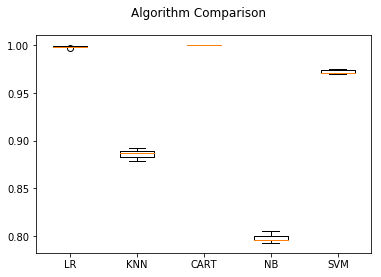

In [91]:
#compare Algorithms


fig = plt.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names)
plt.show()

In [92]:
#prepare the model

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = LogisticRegression()
model.fit(rescaledX, y_train)


C:\Users\francis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [93]:
#Estimated Accuracy

rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

0.9991476667376944
[[21804     0]
 [   24  6330]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     21804
          1       1.00      1.00      1.00      6354

avg / total       1.00      1.00      1.00     28158

